General imports

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading and visualizing the data

In [342]:
# movie database
movies = pd.read_csv('ml-latest-small/movies.csv')
movies = movies.set_index('movieId')
movies.head(10)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [343]:
movies.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [344]:
# ratings database
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [345]:
ratings.describe().round(2)

,userId,movieId,rating,timestamp
count,100836.00,100836.00,100836.00,1.008360e+05
mean,326.13,19435.30,3.50,1.205946e+09
std,182.62,35530.99,1.04,2.162610e+08
min,1.00,1.00,0.50,8.281246e+08
25%,177.00,1199.00,3.00,1.019124e+09
50%,325.00,2991.00,3.50,1.186087e+09
75%,477.00,8122.00,4.00,1.435994e+09
max,610.00,193609.00,5.00,1.537799e+09


## First recomendation tentative with most voted movies
---

A little of EDA with the data

In [346]:
# most voted movies
total_votes = ratings['movieId'].value_counts()
total_votes.head()


356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [347]:
# most voted movie
movies.loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [348]:
# adding most voted to the movies dataset
movies['total_votes'] = total_votes
movies.sort_values('total_votes', ascending= False, inplace= True)
movies.head()

,title,genres,total_votes
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [349]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [350]:
# adding the average rating of each movie 
rating_avg = ratings.groupby('movieId').mean().round(2)['rating']
movies['rating_avg'] = ratings.groupby('movieId').mean().round(2)['rating']
movies.head(10)

,title,genres,total_votes,rating_avg
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.20
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.16
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.19
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.23
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.75
110,Braveheart (1995),Action|Drama|War,237.0,4.03
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.97


## Second recomendation tentative with the average rating

In [351]:
# sorting the dataframe by the highest rating average
movies.sort_values('rating_avg', ascending= False)

,title,genres,total_votes,rating_avg
movieId,,,,
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
147326,The Adventures of Sherlock Holmes and Doctor W...,Crime|Mystery,1.0,5.0
112512,Colourful (Karafuru) (2010),Animation|Drama|Fantasy|Mystery,1.0,5.0
94810,Eva (2011),Drama|Fantasy|Sci-Fi,1.0,5.0
171749,Death Note: Desu nôto (2006–2007),(no genres listed),1.0,5.0
...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN


This result does not actually mean something, the top rated movies have only one vote

In [352]:
# trying with a query for the top rated movies with at least 10 votes
movies.query('total_votes >= 10').sort_values('rating_avg', ascending= False)

,title,genres,total_votes,rating_avg
movieId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.59
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.55
1178,Paths of Glory (1957),Drama|War,12.0,4.54
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.47
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.46
...,...,...,...,...
3593,Battlefield Earth (2000),Action|Sci-Fi,19.0,1.66
3564,"Flintstones in Viva Rock Vegas, The (2000)",Children|Comedy,12.0,1.62
1556,Speed 2: Cruise Control (1997),Action|Romance|Thriller,19.0,1.61


In [353]:
# trying with a query for the top rated movies with at least 50 votes
movies_50votes = movies.query('total_votes >= 50').sort_values('rating_avg', ascending= False)
movies_50votes

,title,genres,total_votes,rating_avg
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
858,"Godfather, The (1972)",Crime|Drama,192.0,4.29
1276,Cool Hand Luke (1967),Drama,57.0,4.27
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.27
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.27
...,...,...,...,...
172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53.0,2.68
173,Judge Dredd (1995),Action|Crime|Sci-Fi,62.0,2.67
432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55.0,2.65


## Third recomendation tentative based on genre similarity

In [354]:
# selecting a set of movies that "i like"
movies_ilike = [1, 15, 356, 5, 3, 8, 17]
movies.loc[movies_ilike]

,title,genres,total_votes,rating_avg
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
15,Cutthroat Island (1995),Action|Adventure|Romance,13.0,3.00
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16
5,Father of the Bride Part II (1995),Comedy,49.0,3.07
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.26
8,Tom and Huck (1995),Adventure|Children,8.0,2.88
17,Sense and Sensibility (1995),Drama|Romance,67.0,3.78


In [355]:
# using a query to get ralated genres to those movies i listed as liked above
# example "Comedy|Romance"
movies_50votes.query('genres== "Comedy|Romance"').sort_values('rating_avg', ascending= False)

,title,genres,total_votes,rating_avg
movieId,,,,
4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.18
1230,Annie Hall (1977),Comedy|Romance,58.0,3.87
1307,When Harry Met Sally... (1989),Comedy|Romance,85.0,3.86
1923,There's Something About Mary (1998),Comedy|Romance,105.0,3.68
440,Dave (1993),Comedy|Romance,76.0,3.55
35836,"40-Year-Old Virgin, The (2005)",Comedy|Romance,74.0,3.55
2572,10 Things I Hate About You (1999),Comedy|Romance,54.0,3.53
357,Four Weddings and a Funeral (1994),Comedy|Romance,103.0,3.52
34162,Wedding Crashers (2005),Comedy|Romance,58.0,3.51


This simple method use the top rated movies with the same genre of those marked as "liked". <br>
Here we start going from "Collaborative Filtering" to "Content based Filtering"

## Looking for Similarity between users 

Considering two users, each one rated 2 diferent movies, we can plot their "Similarity" in a graph

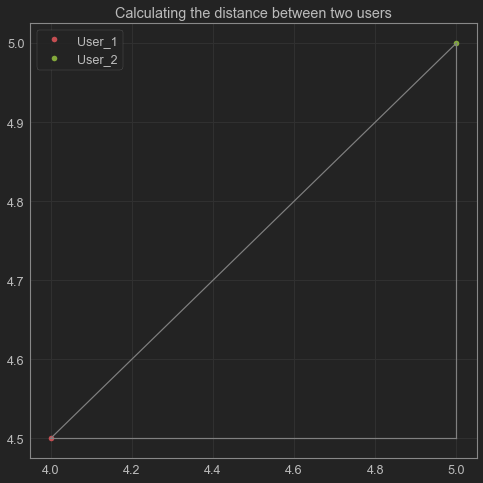

In [356]:
user_1 = [4, 4.5]
user_2 = [5, 5]

# ploting the points
plt.figure(figsize=(8,8))
plt.plot(4, 4.5, 'ro')
plt.plot(5, 5, 'go')
plt.legend(['User_1', 'User_2'])
plt.title('Calculating the distance between two users')

# making a line between the points for visualization
plt.plot([4,5], [4.5, 4.5], linestyle= '-', color='grey')
plt.plot([5, 5], [4.5, 5], linestyle= '-', color='grey')
plt.plot([4, 5], [4.5, 5], linestyle= '-', color='grey')

In [357]:
# calculating the distance 
user_1 = np.array(user_1)
user_2 = np.array(user_2)

def vect_dist(a, b):
    (delta_x, delta_y) = a - b
    return np.sqrt(delta_x**2 + delta_y**2)

print(f'The distance between users is: {vect_dist(user_1, user_2).round(3)}')

The distance between users is: 1.118


In [358]:
# calculating the distance using numpy linear alg.
print(f'The distance between users is: {np.linalg.norm(user_1 - user_2).round(3)}')

The distance between users is: 1.118


In [359]:
def vect_dist(a, b):
    return np.linalg.norm(a - b)

### Extending the concept

In [360]:
# getting some movie rating from user

# userId 1
ratings.query('userId == 1')[['movieId', 'rating']].set_index('movieId')

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [361]:
# creating a function to extract the data from multiple users
def user_rating(user):
    user_ratings = ratings.query(f'userId == {user}')
    user_ratings = user_ratings[['movieId', 'rating']].set_index('movieId')
    return user_ratings

In [362]:
# getting the data
user_1 = user_rating(1)
user_2 = user_rating(2)
user_3 = user_rating(3)

In [363]:
# rated movies in common between user 1 and 3
user_1.join(user_3, lsuffix= '_left', rsuffix= '_right').dropna()

,rating_left,rating_right
movieId,,
527,5.0,0.5
1275,5.0,3.5
1587,5.0,4.5
2018,5.0,0.5
2090,5.0,0.5
2105,4.0,2.0
3703,5.0,5.0


In [364]:
similarity = user_1.join(user_3, lsuffix= '_left', rsuffix= '_right').dropna()
similarity['rating_left']
similarity['rating_right']

movieId
527     0.5
1275    3.5
1587    4.5
2018    0.5
2090    0.5
2105    2.0
3703    5.0
Name: rating_right, dtype: float64

In [365]:
similarity['rating_right']

movieId
527     0.5
1275    3.5
1587    4.5
2018    0.5
2090    0.5
2105    2.0
3703    5.0
Name: rating_right, dtype: float64

In [366]:
# distance between user 1 (left) and user 3 (right)
vect_dist(similarity['rating_left'], similarity['rating_right'])

8.200609733428363

Creating a function to calculate the distance between two users

In [367]:
def user_dist(user_x, user_y):
    user_ratings_x = ratings.query(f'userId == {user_x}')
    user_ratings_x = user_ratings_x[['movieId', 'rating']].set_index('movieId')
    user_ratings_y = ratings.query(f'userId == {user_y}')
    user_ratings_y = user_ratings_y[['movieId', 'rating']].set_index('movieId')
    similarity = user_ratings_x.join(user_ratings_y, lsuffix= f'_{user_x}', rsuffix= f'_{user_y}').dropna()
    return vect_dist(similarity[f'rating_{user_x}'], similarity[f'rating_{user_y}'])

In [368]:
assert user_dist(1, 3) == vect_dist(similarity['rating_left'], similarity['rating_right'])

In [369]:
# putting user 'x' and 'y' labels inside the list
def user_dist(user_x, user_y):
    user_ratings_x = ratings.query(f'userId == {user_x}')
    user_ratings_x = user_ratings_x[['movieId', 'rating']].set_index('movieId')
    user_ratings_y = ratings.query(f'userId == {user_y}')
    user_ratings_y = user_ratings_y[['movieId', 'rating']].set_index('movieId')
    similarity = user_ratings_x.join(user_ratings_y, lsuffix= f'_{user_x}', rsuffix= f'_{user_y}').dropna()
    return [user_x, user_y, vect_dist(similarity[f'rating_{user_x}'], similarity[f'rating_{user_y}'])]

In [370]:
# quantity of unique users
quant_users = ratings['userId'].unique().shape
print(f'Total quantity of unique users is : {quant_users[0]}')

Total quantity of unique users is : 610


In [371]:
# getting the distance of an specific user from all users
def user_dist_from_all(user):
    distances = []
    for user_id in ratings['userId'].unique():
        distance_between_users = user_dist(user, user_id)
        distances.append(distance_between_users)
    return distances

In [372]:
# alternative form with list comprehension and DataFrame
def user_dist_from_all(user):
    all_users = ratings['userId'].unique()
    distance_between_users = [user_dist(user, user_id) for user_id in all_users]
    distances = pd.DataFrame(distance_between_users, columns=[f'user_{user}', 'other_users', 'distances'])
    return distances

In [373]:
user_dist_from_all(7).head()

,user_7,other_users,distances
0,7,1,7.106335
1,7,2,4.031129
2,7,3,0.000000
3,7,4,5.634714
4,7,5,3.354102


Now that we have a way to get the distance from all users, we have to correct our formula.<br>
At the moment, when we have users with 0 movies in common, the distance appears as 0 due to the dropna() after the join

In [374]:
def user_dist(user_x, user_y, minimo = 5):
    user_ratings_x = ratings.query(f'userId == {user_x}')
    user_ratings_x = user_ratings_x[['movieId', 'rating']].set_index('movieId')
    user_ratings_y = ratings.query(f'userId == {user_y}')
    user_ratings_y = user_ratings_y[['movieId', 'rating']].set_index('movieId')
    similarity = user_ratings_x.join(user_ratings_y, lsuffix= f'_{user_x}', rsuffix= f'_{user_y}').dropna()
    
    if (len(similarity) < minimo):
        return [user_x, user_y, 9999]
    
    return [user_x, user_y, vect_dist(similarity[f'rating_{user_x}'], similarity[f'rating_{user_y}'])]

And now def a function to show by the nearest

In [375]:
def nearest_users(user):
    distances = user_dist_from_all(user)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances

In [376]:
nearest_users(1).head(15)

,user_1,distances
other_users,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
9,1,1.000000
258,1,1.000000
319,1,1.118034
398,1,1.224745


## Parameters for testing

In [377]:
# adding the 'number_of_neares_users' parameter to search for the 'n' number of elements

def nearest_users(user, number_of_neares_users = None):
    distances = user_dist_from_all(user, number_of_neares_users = number_of_neares_users)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances

def user_dist_from_all(user, n = None):
    all_users = ratings['userId'].unique()
    if n:
        all_users = all_users[:n]
    distance_between_users = [user_dist(user, user_id) for user_id in all_users]
    distances = pd.DataFrame(distance_between_users, columns=[f'user_{user}', 'other_users', 'distances'])
    return distances

In [378]:
# removing the 9999 from the results

def user_dist(user_x, user_y, minimo = 5):
    user_ratings_x = ratings.query(f'userId == {user_x}')
    user_ratings_x = user_ratings_x[['movieId', 'rating']].set_index('movieId')
    user_ratings_y = ratings.query(f'userId == {user_y}')
    user_ratings_y = user_ratings_y[['movieId', 'rating']].set_index('movieId')
    similarity = user_ratings_x.join(user_ratings_y, lsuffix= f'_{user_x}', rsuffix= f'_{user_y}').dropna()
    
    if (len(similarity) < minimo):
        None # added None here
    
    return [user_x, user_y, vect_dist(similarity[f'rating_{user_x}'], similarity[f'rating_{user_y}'])]


def user_dist_from_all(user, number_of_neares_users = None):
    all_users = ratings['userId'].unique()
    if number_of_neares_users:
        all_users = all_users[:number_of_neares_users]
    distance_between_users = [user_dist(user, user_id) for user_id in all_users]
    distance_between_users = list(filter(None, distance_between_users)) # added the filter here
    distances = pd.DataFrame(distance_between_users, columns=[f'user_{user}', 'other_users', 'distances'])
    return distances

def nearest_users(user, number_of_neares_users = None):
    distances = user_dist_from_all(user, number_of_neares_users = number_of_neares_users)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances

In [379]:
# Getting the most similar user from "me"
me = 1
similars = nearest_users(me, number_of_neares_users= 50)
similar = similars.iloc[0].name

In [380]:
# getting all the movies from the most similar from "me" and removing the movies i've already watched, so i can get just good recomendations
similar_rating = user_rating(similar)
my_ratings = user_rating(me)
similar_rating = similar_rating.drop(my_ratings.index, errors='ignore')
similar_rating.sort_values('rating', ascending=False)

,rating
movieId,
63992,5.0
2717,5.0
2581,5.0
2572,5.0
2485,5.0
168,5.0
2072,5.0
1721,5.0
1357,5.0


In [381]:
# Creating a function and implementing a join in the return
def sugestions_for_userId(user_id, number_of_neares_users = None):
    similars = nearest_users(user_id, number_of_neares_users= number_of_neares_users)
    similar = similars.iloc[0].name
    similar_rating = user_rating(similar)
    my_ratings = user_rating(user_id)
    similar_rating = similar_rating.drop(my_ratings.index, errors='ignore')
    recomendations = similar_rating.sort_values('rating', ascending=False)
    return recomendations.join(movies)

In [382]:
# suggestion for user_Id based on similarity
sugestions_for_userId(1)

,rating,title,genres,total_votes,rating_avg
movieId,,,,,
49772,5.0,"Painted Veil, The (2006)",Drama|Romance,4.0,4.00
8533,5.0,"Notebook, The (2004)",Drama|Romance,38.0,3.57
81562,5.0,127 Hours (2010),Adventure|Drama|Thriller,18.0,3.83
73017,5.0,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller,58.0,3.85
45668,5.0,"Lake House, The (2006)",Drama|Fantasy|Romance,10.0,3.10
81845,5.0,"King's Speech, The (2010)",Drama,58.0,4.04
58154,4.5,"Other Boleyn Girl, The (2008)",Drama|Romance,7.0,3.79
76251,4.5,Kick-Ass (2010),Action|Comedy,43.0,3.65
5309,4.5,Three Men and a Little Lady (1990),Comedy|Romance,8.0,2.56


## Creating a suggestion algorithm based on more than 1 user (k nearest)

In [383]:
def nearest_users(user, n_nearest =10,  number_of_neares_users = None): #adding 'n_nearest = 10'
    distances = user_dist_from_all(user, number_of_neares_users = number_of_neares_users)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances.head(n_nearest) # adding 'n_nearest'

In [384]:
nearest_users(1, 5)

,user_1,distances
other_users,,
578,1,0.0
77,1,0.0
85,1,0.0
175,1,0.0
556,1,0.0


In [385]:
def suggest_to(user_id, n_nearest = 10, number_of_neares_users = None):
    similars = nearest_users(user_id, n_nearest= n_nearest, number_of_neares_users= number_of_neares_users) # adding "n_nearest" in this line
    my_ratings = user_rating(user_id)
    similar_users = similars.index
    similar_users_ratings = ratings.set_index('userId').loc[similar_users]
    recomendations = similar_users_ratings.groupby('movieId').mean()[['rating']] #grouping by the movie_id and taking the mean of the rating
    recomendations = recomendations.sort_values('rating', ascending=False)
    return recomendations.join(movies)

In [386]:
suggest_to(1, n_nearest= 5, number_of_neares_users= 20)

,rating,title,genres,total_votes,rating_avg
movieId,,,,,
2485,5.0,She's All That (1999),Comedy|Romance,29.0,2.84
1270,5.0,Back to the Future (1985),Adventure|Comedy|Sci-Fi,171.0,4.04
2581,5.0,Never Been Kissed (1999),Comedy|Romance,36.0,2.96
2572,5.0,10 Things I Hate About You (1999),Comedy|Romance,54.0,3.53
2571,5.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.19
...,...,...,...,...,...
305,1.0,Ready to Wear (Pret-A-Porter) (1994),Comedy,9.0,2.83
4558,1.0,Twins (1988),Comedy,14.0,2.46
4131,1.0,Making Mr. Right (1987),Comedy|Romance|Sci-Fi,3.0,1.83


So afterall, the nearest users function, in ML can be rewritten as:

In [387]:
# Old
def nearest_users(user, n_nearest =10,  number_of_neares_users = None):
    distances = user_dist_from_all(user, number_of_neares_users = number_of_neares_users)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances.head(n_nearest) 

# New
def knn(user, k_nearest =10,  number_of_neares_users = None): #adding 'n_nearest = 10'
    distances = user_dist_from_all(user, number_of_neares_users = number_of_neares_users)
    distances = distances.sort_values('distances')
    distances = distances.set_index('other_users').drop(user)
    return distances.head(k_nearest) # adding 'n_nearest'

# Testing a new user

In [388]:
# creating a test user
watched_movies = [122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]
watched_movies_ratings = [2, 5, 2, 5, 5, 2, 0.5, 2, 1, 1]
new_user_1 = list(zip(watched_movies, watched_movies_ratings))
movies.loc[watched_movies]

,title,genres,total_votes,rating_avg
movieId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.83
1246,Dead Poets Society (1989),Drama,86.0,3.96
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.80
2329,American History X (1998),Crime|Drama,129.0,4.22
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.15
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
7,Sabrina (1995),Comedy|Romance,54.0,3.19
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.43
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.22


In [389]:
new_user_1

[(122904, 2),
 (1246, 5),
 (2529, 2),
 (2329, 5),
 (2324, 5),
 (1, 2),
 (7, 0.5),
 (2, 2),
 (1196, 1),
 (260, 1)]

In [390]:
def new_user(new_user):
    global ratings
    new_user_id = ratings['userId'].max()+1
    new_user_ratings = pd.DataFrame(new_user, columns= ['movieId', 'rating'])
    new_user_ratings['userId'] = new_user_id
    ratings = pd.concat([ratings, new_user_ratings])
    return  ratings

In [391]:
new_user(new_user_1).tail()

,userId,movieId,rating,timestamp
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [392]:
# suggesting to our new user (611)
suggest_to(611)

,rating,title,genres,total_votes,rating_avg
movieId,,,,,
10,5.0,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.50
350,5.0,"Client, The (1994)",Drama|Mystery|Thriller,57.0,3.39
6365,5.0,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,96.0,3.35
6619,5.0,Uptown Girls (2003),Comedy,6.0,2.92
2924,5.0,Drunken Master (Jui kuen) (1978),Action|Comedy,10.0,4.05
...,...,...,...,...,...
26095,0.5,"Carabineers, The (Carabiniers, Les) (1963)",Comedy|Drama|War,1.0,0.50
4039,0.5,Annie (1982),Children|Musical,16.0,3.12
2707,0.5,Arlington Road (1999),Thriller,22.0,3.27


## Changing the database to "only 50+ votes movies"

In [393]:
ratings = ratings.set_index('movieId').loc[movies_50votes.index]
ratings.head()

,userId,rating,timestamp
movieId,,,
318,2,3.0,1.445715e+09
318,5,3.0,8.474349e+08
318,6,5.0,8.455532e+08
318,8,5.0,8.394635e+08
318,11,4.0,9.021551e+08


In [394]:
ratings = ratings.reset_index()
ratings.head()

,movieId,userId,rating,timestamp
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [396]:
# Now we are only suggesting movies with more than 50 votes to our new user 611
suggest_to(611)

,rating,title,genres,total_votes,rating_avg
movieId,,,,,
1304,5.0,Butch Cassidy and the Sundance Kid (1969),Action|Western,62.0,3.94
5989,5.0,Catch Me If You Can (2002),Crime|Drama,115.0,3.92
908,5.0,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,57.0,4.18
33166,5.0,Crash (2004),Crime|Drama,50.0,3.89
4034,5.0,Traffic (2000),Crime|Drama|Thriller,70.0,3.90
...,...,...,...,...,...
4226,2.0,Memento (2000),Mystery|Thriller,159.0,4.12
1,2.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
1073,1.0,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,119.0,3.87


A little further improvment can be done with the `suggest_to` function, after taking the mean in the `groupby` for the k_nearest, we cna discard those movies with low vote count for the k_nearest group

In [409]:
def suggest_to(user_id, k_nearest = 10, number_of_neares_users = None):
    similars = nearest_users(user_id, n_nearest= k_nearest, number_of_neares_users= number_of_neares_users) 
    my_ratings = user_rating(user_id)
    similar_users = similars.index
    similar_users_ratings = ratings.set_index('userId').loc[similar_users]
    recomendations = similar_users_ratings.groupby('movieId').mean()[['rating']] #grouping by the movie_id and taking the mean of the rating
    
    n_shows = similar_users_ratings.groupby('movieId').count()[['rating']] # adding a counter to the movies rating
    filter_min = k_nearest / 2
    recomendations = recomendations.join(n_shows, lsuffix='_user_mean', rsuffix='_n_count')
    recomendations = recomendations.query('rating_n_count >= %.2f' % filter_min)
    recomendations = recomendations.sort_values('rating_user_mean', ascending= False)
    return recomendations.join(movies) 

## Testing the algorithm with k_nearest = 10, 20 and 30

In [411]:
suggest_to(611, number_of_neares_users= 500)

,rating_user_mean,rating_n_count,title,genres,total_votes,rating_avg
movieId,,,,,,
318,4.6,10,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
356,4.5,6,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16


In [412]:
suggest_to(611, k_nearest= 20 ,number_of_neares_users= 500)

,rating_user_mean,rating_n_count,title,genres,total_votes,rating_avg
movieId,,,,,,
318,4.611111,18,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
296,4.600000,10,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.20
356,4.269231,13,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16


In [413]:
suggest_to(611, k_nearest= 30 ,number_of_neares_users= 500)

,rating_user_mean,rating_n_count,title,genres,total_votes,rating_avg
movieId,,,,,,
318,4.537037,27,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
296,4.533333,15,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.20
356,4.111111,18,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.16
